<a href="https://colab.research.google.com/github/Nagilameher45/Artificial-Intelligence/blob/main/PROJECT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [18]:
# Load Data
df = pd.read_csv("/content/Spotify_dataset.csv")
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [19]:
# Handle Missing Values
df = df.fillna(df.mean(numeric_only=True))

In [20]:
# Useful Numerical Features
features = ['danceability','energy','loudness','speechiness',
            'acousticness','instrumentalness','liveness',
            'valence','tempo']

In [21]:
X = df[features]
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.748,0.916,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036
1,0.726,0.815,-4.969,0.0373,0.072400,0.004210,0.3570,0.6930,99.972
2,0.675,0.931,-3.432,0.0742,0.079400,0.000023,0.1100,0.6130,124.008
3,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,121.956
4,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976
...,...,...,...,...,...,...,...,...,...
32828,0.428,0.922,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170
32829,0.522,0.786,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041
32830,0.529,0.821,-4.899,0.0481,0.108000,0.000001,0.1500,0.4360,127.989
32831,0.626,0.888,-3.361,0.1090,0.007920,0.127000,0.3430,0.3080,128.008


In [22]:
# Scale the Numerical Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

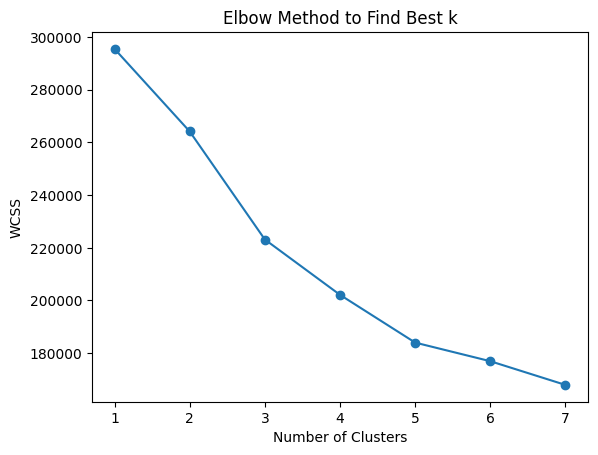

In [23]:
# Elbow Method to Find Optimal k
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 8), wcss, marker='o')
plt.title("Elbow Method to Find Best k")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [24]:
# Apply K-Means (k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

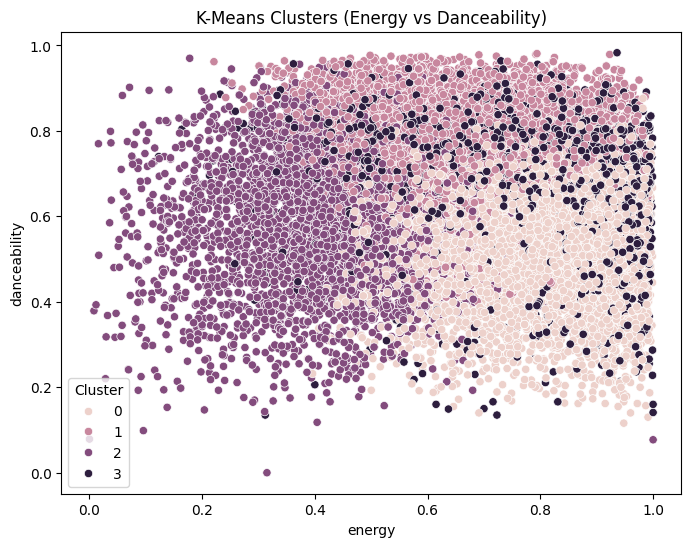

In [25]:
# Visualize Clusters (Energy vs Danceability)
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['energy'], y=df['danceability'], hue=df['Cluster'])
plt.title("K-Means Clusters (Energy vs Danceability)")
plt.show()

In [26]:
# Cluster Summary
print(df.groupby('Cluster')[features].mean())

         danceability    energy   loudness  speechiness  acousticness  \
Cluster                                                                 
0            0.556110  0.800113  -5.280816     0.087516      0.073352   
1            0.750684  0.703786  -6.408660     0.135290      0.149715   
2            0.607019  0.435911 -10.367030     0.090825      0.499229   
3            0.659837  0.782878  -6.951561     0.072648      0.076203   

         instrumentalness  liveness   valence       tempo  
Cluster                                                    
0                0.022143  0.239314  0.416349  132.501518  
1                0.012082  0.163444  0.652478  113.867804  
2                0.082290  0.157718  0.396869  113.142385  
3                0.743033  0.191766  0.386069  125.079468  


In [27]:
# Simple Recommendation
song_index = 0
song_cluster = df.loc[song_index, 'Cluster']

print("\nSelected Song:", df.loc[song_index, 'track_name'])
print("Cluster:", song_cluster)



Selected Song: I Don't Care (with Justin Bieber) - Loud Luxury Remix
Cluster: 1


In [28]:
# Recommend songs from same cluster
recommended = df[df['Cluster'] == song_cluster][['track_name','track_artist','playlist_genre']]
recommended = recommended.head(10)

print("\nRecommended Songs:")
print(recommended)


Recommended Songs:
                                           track_name   track_artist  \
0   I Don't Care (with Justin Bieber) - Loud Luxur...     Ed Sheeran   
1                     Memories - Dillon Francis Remix       Maroon 5   
4             Someone You Loved - Future Humans Remix  Lewis Capaldi   
5   Beautiful People (feat. Khalid) - Jack Wins Remix     Ed Sheeran   
10  Cross Me (feat. Chance the Rapper & PnB Rock) ...     Ed Sheeran   
12                                         Body On My    Loud Luxury   
15  South of the Border (feat. Camila Cabello & Ca...     Ed Sheeran   
17  Say My Name (feat. Bebe Rexha & J Balvin) - Lu...   David Guetta   
18  Dancing With A Stranger (With Normani) - Cheat...      Sam Smith   
21     All Around The World (La La La) - Marnik Remix          R3HAB   

   playlist_genre  
0             pop  
1             pop  
4             pop  
5             pop  
10            pop  
12            pop  
15            pop  
17            pop  
18     